<!-- #### Problem Statement -
#### To predict the Won Games of the properties based on the provided data, we can use machine learning techniques.
#### Here's a step-by-step approach to building a predictive model:  By using  Decision tree regression and RandomforestRegression. -->

### Steps and tasks :

#### Step 1: Reading and Understanding the Data

#### Step 2 : Data Cleaning and Preparation

#### Step 3: Visualizing the data

#### Step 3.1 : Visualising Categorical Data
   
#### Step 4 : Dummy Variables

#### Step 5 : Deriving new features

#### Step 6 : Residual Analysis of Model

#### Step 7 : Train-Test Split and feature scaling

#### Step 8 : Model Building

#### Step 9 : Prediction and Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Basketball.csv")

In [3]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


In [4]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [5]:
df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [6]:
df.shape

(61, 13)

In [7]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [8]:
df.describe()

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


In [9]:
df.Team.value_counts()

Team
Team 1     1
Team 32    1
Team 34    1
Team 35    1
Team 36    1
          ..
Team 26    1
Team 27    1
Team 28    1
Team 29    1
Team 61    1
Name: count, Length: 61, dtype: int64

In [10]:
df['HighestPositionHeld'].value_counts()

HighestPositionHeld
1     9
4     6
2     5
6     5
7     5
8     4
5     4
3     4
10    4
16    3
17    3
9     2
12    2
19    1
14    1
11    1
20    1
15    1
Name: count, dtype: int64

In [11]:
df.Tournament.value_counts()

Tournament
1     6
4     5
12    4
2     4
3     4
6     3
86    3
17    2
82    2
7     2
9     2
11    2
51    2
13    1
73    1
5     1
70    1
58    1
14    1
18    1
45    1
42    1
21    1
23    1
80    1
33    1
27    1
38    1
36    1
37    1
43    1
44    1
20    1
Name: count, dtype: int64

In [12]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler     
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [14]:
df["Team"] = label_encoder.fit_transform(df["Team"])
df["Score"] = label_encoder.fit_transform(df["Score"])
df["PlayedGames"] = label_encoder.fit_transform(df["PlayedGames"])
df["WonGames"] = label_encoder.fit_transform(df["WonGames"])
df["DrawnGames"] = label_encoder.fit_transform(df["DrawnGames"])
df["LostGames"] = label_encoder.fit_transform(df["LostGames"])
df["BasketScored"] = label_encoder.fit_transform(df["BasketScored"])
df["BasketGiven"] = label_encoder.fit_transform(df["BasketGiven"])
df["TournamentChampion"] = label_encoder.fit_transform(df["TournamentChampion"])
df["Runner-up"] = label_encoder.fit_transform(df["Runner-up"])
df["TeamLaunch"] = label_encoder.fit_transform(df["TeamLaunch"])


In [15]:
df.corr()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Team,1.000000,-0.279608,0.114595,0.094124,0.172475,0.017121,-0.118102,0.013315,0.100476,-0.045771,-0.017029,0.199024,0.515961
Tournament,-0.279608,1.000000,-0.144598,-0.188894,0.014187,0.363143,0.452535,0.068156,0.041854,0.719684,0.714529,-0.657686,-0.708071
Score,0.114595,-0.144598,1.000000,0.611809,-0.423250,-0.215521,-0.218155,0.599830,0.046642,0.069624,-0.013808,0.060592,0.190194
PlayedGames,0.094124,-0.188894,0.611809,1.000000,-0.333570,-0.157373,-0.401953,0.708468,0.097934,-0.022592,-0.096216,0.096993,0.272985
WonGames,0.172475,0.014187,-0.423250,-0.333570,1.000000,0.205979,0.114321,-0.376119,0.060858,-0.245293,-0.135802,0.080469,0.063992
DrawnGames,0.017121,0.363143,-0.215521,-0.157373,0.205979,1.000000,0.050794,0.038507,0.295362,0.343404,0.325975,-0.334037,-0.335022
LostGames,-0.118102,0.452535,-0.218155,-0.401953,0.114321,0.050794,1.000000,-0.286937,-0.286843,0.394815,0.456399,-0.382769,-0.304378
BasketScored,0.013315,0.068156,0.599830,0.708468,-0.376119,0.038507,-0.286937,1.000000,0.247162,0.204651,0.129118,-0.079855,0.080719
BasketGiven,0.100476,0.041854,0.046642,0.097934,0.060858,0.295362,-0.286843,0.247162,1.000000,0.127643,0.109080,0.006697,0.020994
TournamentChampion,-0.045771,0.719684,0.069624,-0.022592,-0.245293,0.343404,0.394815,0.204651,0.127643,1.000000,0.768122,-0.416302,-0.395739


<Axes: >

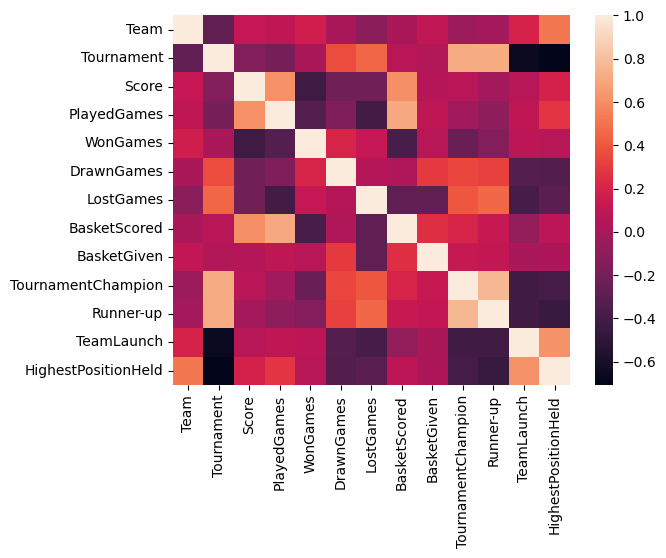

In [16]:
sns.heatmap(df.corr())

<Axes: ylabel='count'>

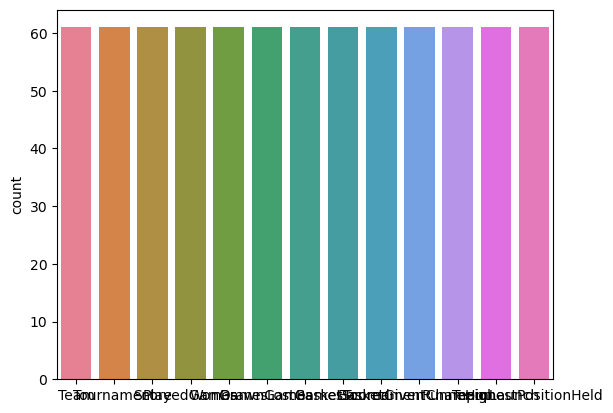

In [17]:
sns.countplot(df)

In [19]:
# sns.histplot(df[''])

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [21]:
df["Team"] = label_encoder.fit_transform(df["Team"])
df["Score"] = label_encoder.fit_transform(df["Score"])
df["PlayedGames"] = label_encoder.fit_transform(df["PlayedGames"])
df["WonGames"] = label_encoder.fit_transform(df["WonGames"])
df["DrawnGames"] = label_encoder.fit_transform(df["DrawnGames"])
df["LostGames"] = label_encoder.fit_transform(df["LostGames"])
df["BasketScored"] = label_encoder.fit_transform(df["BasketScored"])
df["BasketGiven"] = label_encoder.fit_transform(df["BasketGiven"])
df["TournamentChampion"] = label_encoder.fit_transform(df["TournamentChampion"])
df["Runner-up"] = label_encoder.fit_transform(df["Runner-up"])
df["TeamLaunch"] = label_encoder.fit_transform(df["TeamLaunch"])


In [22]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,0,86,44,28,15,41,35,48,35,5,2,0,1
1,11,86,43,28,14,43,38,47,34,4,3,0,1
2,22,80,35,24,7,45,48,41,37,2,9,0,1
3,33,82,32,26,4,48,51,40,39,6,7,2,1
4,44,86,31,28,5,50,54,43,41,7,8,0,1


<Axes: xlabel='Score', ylabel='LostGames'>

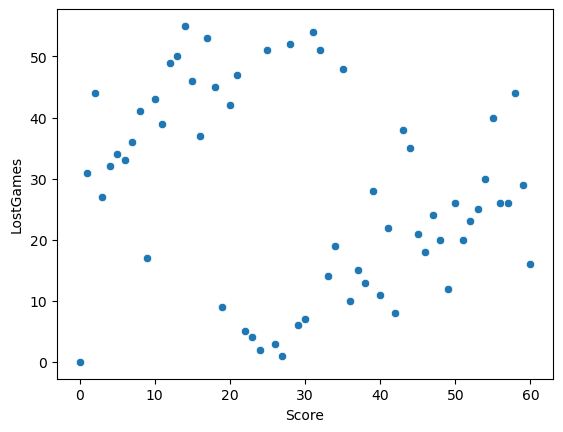

In [23]:
sns.scatterplot(x=df['Score'],y=df['LostGames'])

<Axes: xlabel='HighestPositionHeld', ylabel='Count'>

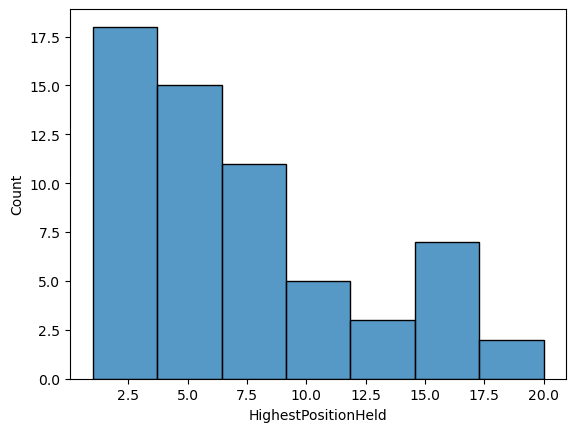

In [24]:
sns.histplot(df['HighestPositionHeld'])

#### Tournament Performance prediction

In [25]:
from sklearn.model_selection import train_test_split
X = df[['PlayedGames', 'BasketScored', 'HighestPositionHeld']]  # Independent variables
y = df[['DrawnGames', 'LostGames']]           

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred=model1.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 246.21697462494222
R-squared: 0.0820676375150366


#### Ridge Regression


In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
ridge.intercept_
ridge.coef_

array([[-0.27067536,  0.22581196, -0.91146827],
       [-0.32077029, -0.04888752, -0.66006759]])

In [30]:
ridge = Ridge(alpha = 5)
#  In Ridge Regression, the alpha parameter controls the strength of the regularization. A higher alpha leads to stronger regularization.
# alpha value of 5, indicating moderate regularization strength.

In [31]:
X = df.HighestPositionHeld.values.reshape(-1,1)
y=df.LostGames

In [32]:
ridge.fit(X,y)

Ridge(alpha=5)

In [33]:
ridge.intercept_

34.53018755319877

In [34]:
ridge.coef_

array([-0.92440148])

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
#regularization parameter (alpha)
#tune this parameter using cross-validation alpha=0.1.
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 246.21784641724068


#### implement Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
X = df[['PlayedGames', 'BasketScored', 'HighestPositionHeld']]  # Independent variables
y = df[['DrawnGames', 'LostGames']] 
alpha = 0.1  # You can tune this parameter using cross-validation
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train, y_train)
y_pred1 = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 246.21784641724068


### support vector regression

In [37]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [38]:
from sklearn.svm import SVR
X = df.drop(['Score'], axis=1)  
y = df['Score']  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svr_model = SVR(kernel='linear') 
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 471.43919736562634


In [39]:
r2 = r2_score(y_test, y_pred)
r2

-0.6414608009145588

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

In [56]:
X = df.drop(columns=["Team", "TournamentChampion"])
y = df["TournamentChampion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.6153846153846154


C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.23076923076923078
Mean Squared Error: 0.38461538461538464
R-squared: 0.7847682119205297


In [66]:
# Display Results
results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}


Model Evaluation Results:
           Model  Accuracy
0  Random Forest  0.846154
1            SVM  0.846154
2  Decision Tree  0.846154


In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [77]:
from sklearn.metrics import f1_score

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid_rf,
    cv=2,
    scoring='f1_weighted',  # for multiclass
    n_jobs=-1
)
grid_rf.fit(X_train_scaled, y_train)

print("\nBest Parameters for Random Forest (GridSearchCV):", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
rf_pred = best_rf.predict(X_test_scaled)

print("F1 Score (Tuned RF):", f1_score(y_test, rf_pred, average='weighted'))


C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(



Best Parameters for Random Forest (GridSearchCV): {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
F1 Score (Tuned RF): 0.8862876254180603


In [78]:

# Randomized Search - SVM
param_dist_svc = {
    'C': np.logspace(-2, 2, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

rand_svc = RandomizedSearchCV(SVC(), param_distributions=param_dist_svc, n_iter=10, cv=3, scoring='f1', random_state=42, n_jobs=-1)
rand_svc.fit(X_train_scaled, y_train)

print("\nBest Parameters for SVM (RandomizedSearchCV):", rand_svc.best_params_)
best_svc = rand_svc.best_estimator_
svc_pred = best_svc.predict(X_test_scaled)
print("F1 Score (Tuned SVM):", f1_score(y_test, svc_pred, average='weighted'))



Best Parameters for SVM (RandomizedSearchCV): {'kernel': 'rbf', 'gamma': 'auto', 'C': 0.5994842503189409}
F1 Score (Tuned SVM): 0.7756410256410255


C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\kumar\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
